In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.api as sm

import sys
import os

IN_COLAB = "google.colab" in sys.modules

The code above loads the data, do not modify.

***

# TSO Semester Week 4: ARIMA Models

In this exercise, we will focus on all topics mentioned in the **TSO forecasting script**, Sections *"ARIMA Models"*. Consequently, this exercise focuses on working with time series data, handling processing, and explore fit *ARIMA* and *SARIMA* models for prediction.

This exercise consists of the following eight parts:
1. Importing and Processing Time Series Data
2. Time Series Visualization
3. Autocorrelation Plot (ACF)
4. ARIMA model
5. SARIMA model

***
## PART 1: Importing and Processing Time Series Data


### Tasks:
1. Import the *CO2* data set available in the *statsmodels* library, which represent monthly observations of CO2 levels starting from 1959-01.
2. Transform the *pandas* dataframe such that:
- Create a *Month* column that is a datetime describing the timestamp of the time series. Declare it as index.
- Drop the initial time column that is a float object and not a datetime object.

### Import CO2 dataset

In [2]:
# Load the CO2 dataset
data = sm.datasets.get_rdataset('co2', 'datasets').data
data.head()

,time,value
0,1959.000000,315.42
1,1959.083333,316.31
2,1959.166667,316.50
3,1959.250000,317.56
4,1959.333333,318.13


### Transform the dataframe

In [3]:
# Transform the time column to timestamp and declare it as index
data['Month'] = pd.date_range(start='1959-01', periods=len(data), freq='M')
data.set_index('Month', inplace=True)
data = data.drop(columns='time')

#Visualize the data
data.head()

C:\Users\kruu\AppData\Local\Temp\ipykernel_22196\2553383916.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Month'] = pd.date_range(start='1959-01', periods=len(data), freq='M')


,value
Month,
1959-01-31,315.42
1959-02-28,316.31
1959-03-31,316.50
1959-04-30,317.56
1959-05-31,318.13


***
## PART 2: Time Series Visualization

### Tasks:
1. Add a column to the data for the *rolling mean* over 12 months.
2. Add a column to the data for the *rolling standard deviation* over 12 months.
3. Plot the original time series and the rolling mean.
4. Add the standard deviation using matplotlib *fill_between* function.
5. Add appropriate labels and grid lines to enhance readability of your plots.

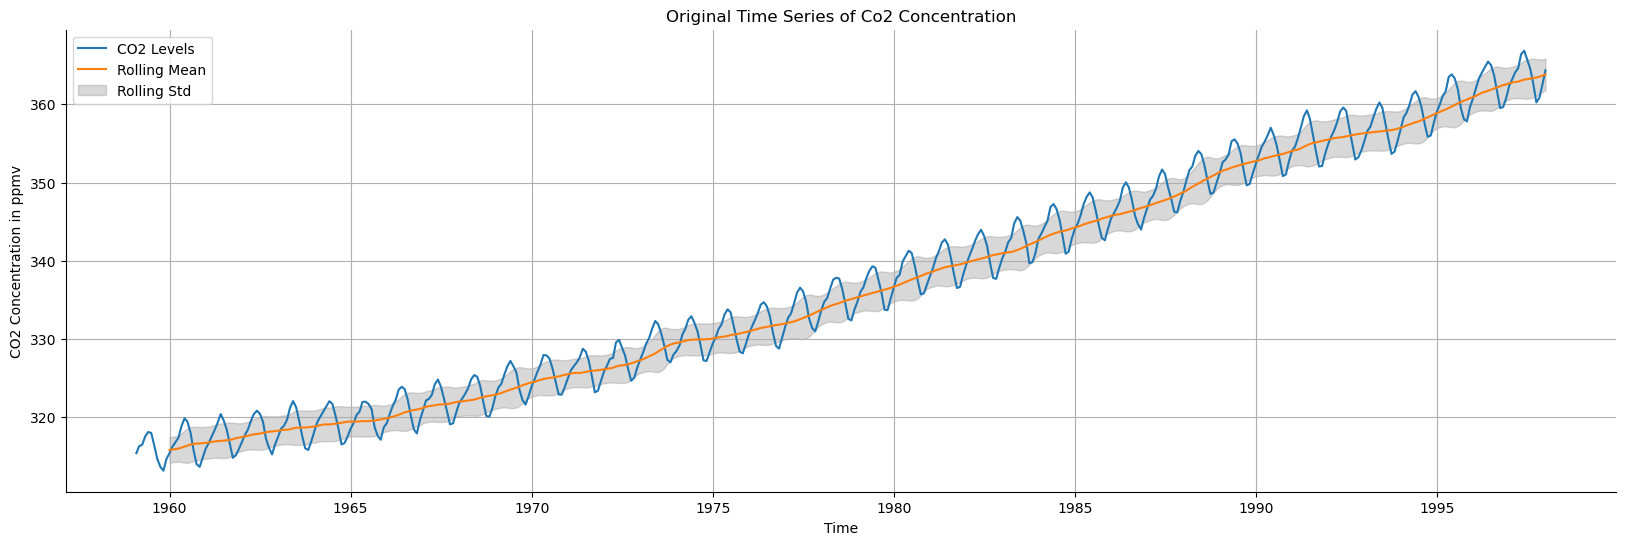

In [4]:
# Calculate the rolling mean and rolling standard deviation over 12 months
data['Rolling Mean'] = data['value'].rolling(window=12).mean()
data['Rolling Std'] = data['value'].rolling(window=12).std()

# Plot the original time series
plt.figure(figsize=(20, 6))
plt.plot(data["value"], label='CO2 Levels')
plt.plot(data["Rolling Mean"], label='Rolling Mean')
plt.fill_between(data.index, data["Rolling Mean"] + data["Rolling Std"],data["Rolling Mean"] - data["Rolling Std"], color="gray", alpha=0.3, label="Rolling Std")
plt.title("Original Time Series of Co2 Concentration")
plt.xlabel('Time')
plt.ylabel('CO2 Concentration in ppmv')
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.legend()
plt.show()

### Questions:
1. Does the time series has a trend? Yes obviously.
2. Does the time series has a seasonal component? Yes obviously.
3. Does the variance depends on the time of observation? The variance looks quite constant visually. 
4. Is the time series stationary? No.

*** 
## PART 3: Autocorrelation Plot (ACF)

### Tasks:
1. Use the *statsmodels* function called *plot_acf* to plot the autocorrelation plot of the time series.
2. Add appropriate labels and grid lines to enhance readability of your plots.


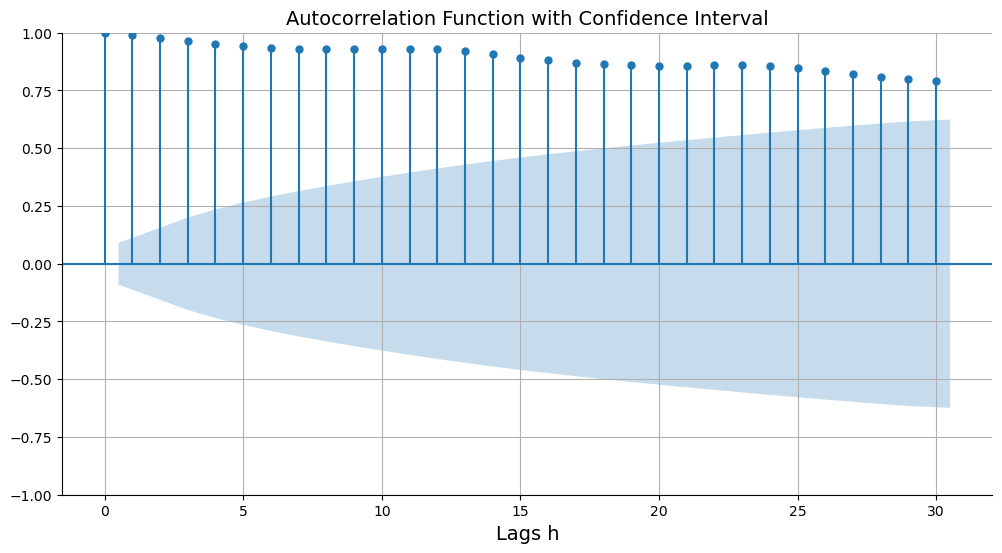

In [5]:
# import the autocorrelation function plot
from statsmodels.graphics.tsaplots import plot_acf

# Plot the autocorrelogram
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(data['value'], lags=30, alpha=0.05, ax=ax)

plt.xlabel('Lags h', fontsize = 14)
plt.title('Autocorrelation Function with Confidence Interval', fontsize = 14)
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

### Questions - Can you conlcude about:
- The Trend? There is an obvious trend as y_t is very much correlated to all the previous lags.
- The Seasonality? It looks like that y_t is slightly more correlated to y_t-12 than the other lags. So yes there is a seasonality.
- The Stationarity? No, it does not looks like the ACF of a white noise.

### Make assumptions about the ype of model to use:
- AR models / ARMA models (without the integrate part) / ARIMA models / SARIMA models? SARIMA model: Trend will require differencing (so an integrate part), and seasonality will require seasonal differencing.

*** 
## PART 4: ARIMA Model

### Tasks:
1. Use the *auto_arima* function form the *pmdarima* library to fit an ARIMA model on the time series.
2. Print the summary of the fitting.
3. Plot the initial time series, the fitted model, the prediction for the next 48 months and the 95% confidence interval for the prediction.
4. Use the *plot_diagnostic* method to evaluate the residuals of the fitted model.

In [6]:
import pmdarima as pm

# Automatically select the best ARIMA model
model_arima = pm.auto_arima(data["value"].dropna(),
                      start_p=0, max_p=20,   # Range of AR orders
                      start_q=0, max_q=20,   # Range of MA orders
                      d=None,               # Automatically determine differencing order
                      seasonal=False,        # Set to True for Seasonal ARIMA (SARIMA)
                      stepwise=False,        # Use stepwise selection (faster), set to False for exhaustive search
                      trace=False,           # Print model selection process
                      error_action='ignore',  # Ignore errors for invalid models
                      suppress_warnings=True)  # Suppress convergence warnings

#Print the results of the fitting
print(model_arima.summary())

c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  468
Model:               SARIMAX(4, 1, 1)   Log Likelihood                -434.465
Date:                Tue, 25 Feb 2025   AIC                            882.929
Time:                        09:09:57   BIC                            911.954
Sample:                    01-31-1959   HQIC                           894.351
                         - 12-31-1997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0365      0.005      7.877      0.000       0.027       0.046
ar.L1          1.5197      0.057     26.482      0.000       1.407       1.632
ar.L2         -0.8859      0.101     -8.757      0.0

c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\kruu\AppData\Local\Temp\ipykernel_22196\3498573747.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=30),


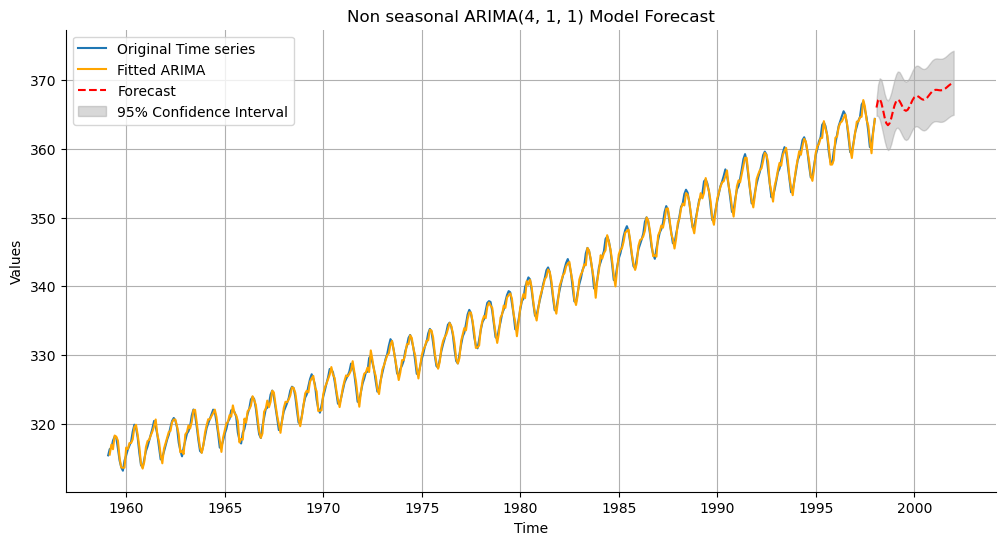

In [7]:
forecast_steps = 48
forecast, conf_int = model_arima.predict(n_periods=forecast_steps, return_conf_int=True)

# Extend the index for plotting
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=30),
                               periods=forecast_steps, freq='M')

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data['value'].dropna(), label="Original Time series")
plt.plot(model_arima.fittedvalues()[1:], label="Fitted ARIMA", color='orange')
plt.plot(forecast_index, forecast, label="Forecast", color="red", linestyle="--")
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color="gray", alpha=0.3, label="95% Confidence Interval")
plt.title(f"Non seasonal ARIMA{model_arima.order} Model Forecast")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Values")
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(True)

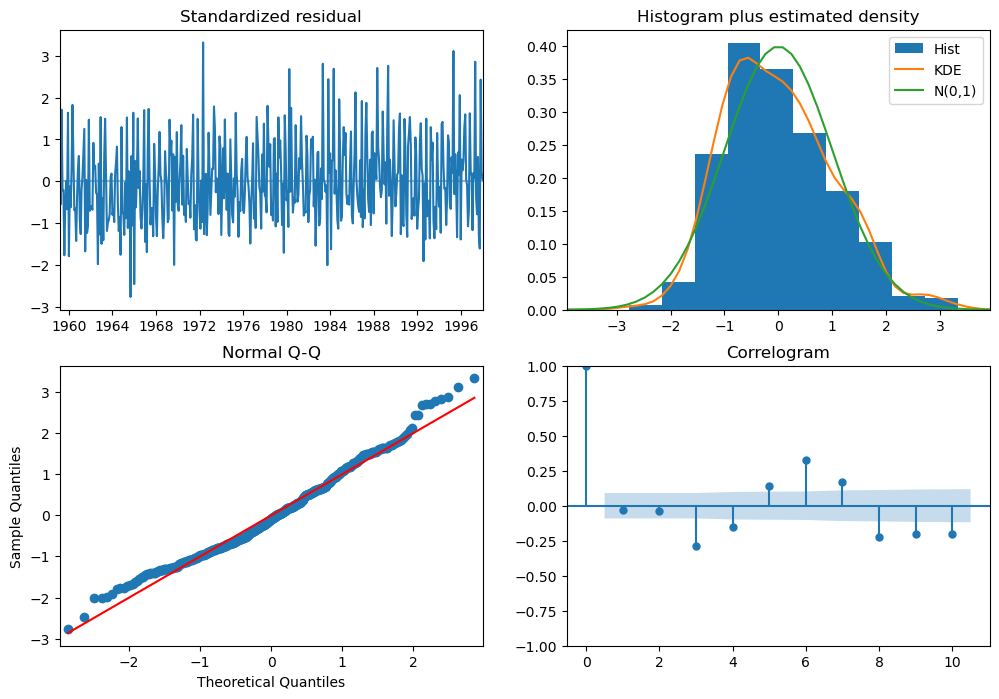

In [9]:
# Evaluate the residuals of the model with plot_diagnostic
model_arima.plot_diagnostics(figsize=(12, 8))
plt.show()

### Questions:
- Which ARIMA order are found? Does it makes sense? Do you think the model is suitable? ar order = 4, integration order = 1, ma order = 1. Yes it makes sense because of the trend observed, but it is not suitable as we don't have seasonality. 
- What can you say about the fit of the model regarding the true time series? What can you say about the prediction? The fit of the true time series is very good, but the prediction becomes linear for longer forcasting horizons. This is beacause seasonality is not modeled. 
- What can you say about the white noise nature of the residuals? Should we explore a more complex model? The residuals are not white noise. The distribution is not normal, the QQ-plot shows discrepencies for extrem quantiles with the ones of a gaussian, and the ACF plot is not the one of a white noise. The residuals don't have the right properties, wo we have to explore a more complex model. 

***
## PART 5: SARIMA Model

### Tasks:
1. Use the *auto_arima* function form the *pmdarima* library to fit a SARIMA model on the time series.
2. Print the summary of the fitting.
3. Plot the initial time series, the fitted model, the prediction for the next 48 months and the 95% confidence interval for the prediction.
4. Use the *plot_diagnostic* method to evaluate the residuals of the fitted model.

In [10]:
model_sarima = pm.auto_arima(data["value"].dropna(),
                      start_p=0, max_p=20,   # Range of AR orders
                      start_q=0, max_q=20,   # Range of MA orders
                      d=None,               # Automatically determine differencing order
                      seasonal=True,        # Set to True for Seasonal ARIMA (SARIMA)
                      m = 12,               # Seasonal cycle period
                      stepwise=False,        # Use stepwise selection (faster), set to False for exhaustive search
                      trace=False,           # Print model selection process
                      error_action='ignore',  # Ignore errors for invalid models
                      suppress_warnings=True)  # Suppress convergence warnings

print(model_sarima.summary())


c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  468
Model:             SARIMAX(0, 1, 3)x(0, 1, [1], 12)   Log Likelihood                 -83.433
Date:                              Tue, 25 Feb 2025   AIC                            176.866
Time:                                      09:13:45   BIC                            197.468
Sample:                                  01-31-1959   HQIC                           184.983
                                       - 12-31-1997                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3394      0.047     -7.284      0.000      -0.431      -0.248
ma.L2         -0.01

c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\kruu\AppData\Local\miniconda3\envs\tso-fs25\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\kruu\AppData\Local\Temp\ipykernel_22196\1064227946.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=30),


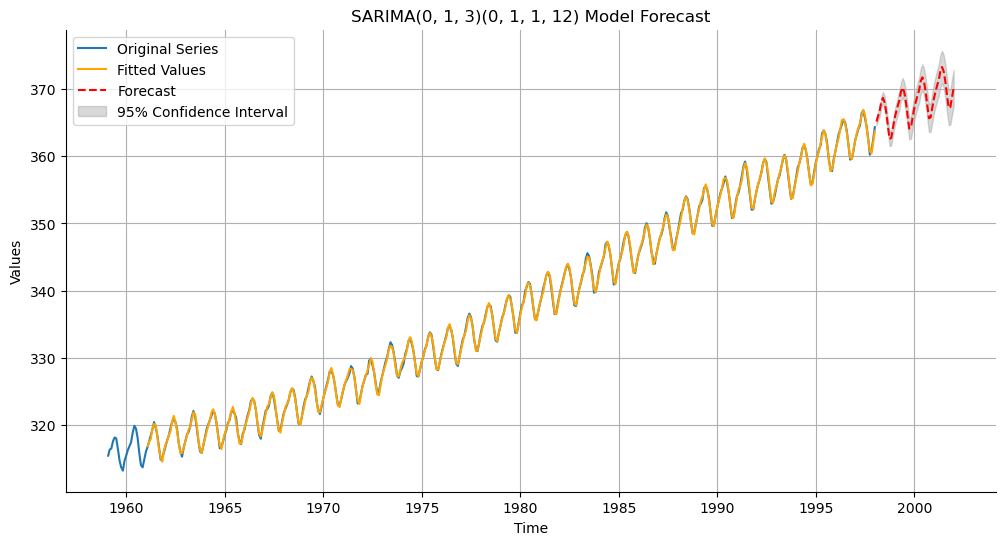

In [11]:
forecast_steps = 48
forecast, conf_int = model_sarima.predict(n_periods=forecast_steps, return_conf_int=True)

# Extend the index for plotting
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=30),
                               periods=forecast_steps, freq='M')

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(data['value'].dropna(), label="Original Series")
plt.plot(model_sarima.fittedvalues()[24:], label="Fitted Values", color='orange')
plt.plot(forecast_index, forecast, label="Forecast", color="red", linestyle="--")
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color="gray", alpha=0.3, label="95% Confidence Interval")
plt.title(f"SARIMA{model_sarima.order}{model_sarima.seasonal_order} Model Forecast")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Values")
plt.grid(True)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.grid(True)

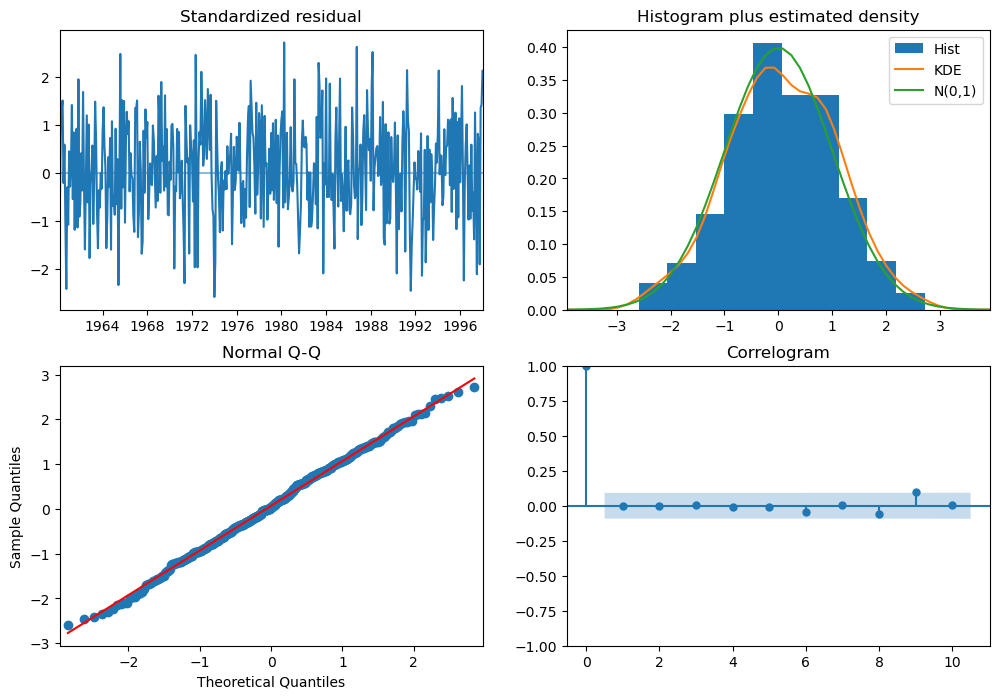

In [12]:
# Analyse the residuals of the model with plot_diagnostic
model_sarima.plot_diagnostics(figsize=(12, 8))
plt.show()

### Questions:
- What are the orders for the non-seasonal and the seasonal part of the SARIMA? How do they compare to the fitted ARIMA? Non sesonal: 0,1,3 and seasonal 0,1,1 with s=12. The AR component has been removed. 
- What can you say about the fitted model and the prediction? How do you compare the results with the non-seasonal ARIMA? The fit of the observed values is excellent, and the prediction seems to have the same behaviour.
- What can you say about the residuals? They are white noise. The model is then suitable.